In [1]:
import os
import sys
import random
import shutil
from PIL import Image
import matplotlib.pyplot as plt

# Add  project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from utils.utils import check_file_extensions, display_random_images

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
source_dir = "../data/train"

Uncomment the cell below to get a sample of images in `train` folder.

In [15]:
# destination_dir = "../data/train_sampled"

# sample_size = 5

# os.makedirs(destination_dir, exist_ok=True)

# # Get samples from each folder
# for class_folder in os.listdir(source_dir):
#     subfolder_path = os.path.join(source_dir, class_folder)
    
#     if os.path.isdir(subfolder_path):  # Ensure it's a directory
#         # Get all image files in the subfolder
#         images = [img for img in os.listdir(subfolder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
#         # Randomly sample images
#         sampled_images = random.sample(images, min(sample_size, len(images)))
        
#         # Create a corresponding subfolder in the destination directory
#         class_destination = os.path.join(destination_dir, class_folder)
#         os.makedirs(class_destination, exist_ok=True)
        
#         # Copy sampled images to the new subfolder
#         for image in sampled_images:
#             shutil.copy(os.path.join(subfolder_path, image), os.path.join(class_destination, image))
            
# print("Sampling completed!")

### EDA - File Types

In [3]:
# Check for unique file extensions
file_extensions = check_file_extensions(source_dir)

print("Unique file extensions in the dataset:", file_extensions)

Unique file extensions in the dataset: {'.jpg'}


### EDA - Image Resolution Distribution

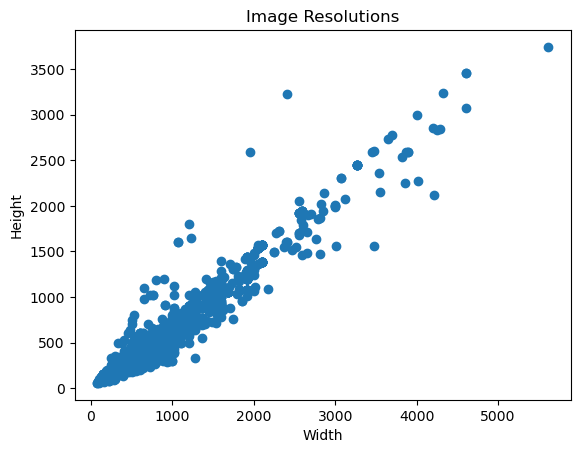

In [32]:
image_resolutions = []

for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(root, file)
            with Image.open(image_path) as img:
                image_resolutions.append(img.size)  # img.size is a tuple (width, height)

widths, heights = zip(*image_resolutions)
plt.scatter(widths, heights)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Resolutions')
plt.show()

* Image resolution varies quite a bit, with majority of the images being within 1500 px (height) x 2000 px (width).
* Resizing of images will have to be done to ensure uniformity.

### EDA - Class Distribution

In [17]:
# Extract class names (subfolder names)
target_classes = [folder for folder in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, folder))]

print("Target Classes:", target_classes)

Target Classes: ['Dodge Dakota Crew Cab 2010', 'GMC Canyon Extended Cab 2012', 'Hyundai Santa Fe SUV 2012', 'Dodge Durango SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012', 'Ford Mustang Convertible 2007', 'Buick Rainier SUV 2007', 'Jeep Compass SUV 2012', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Ford Edge SUV 2012', 'Dodge Ram Pickup 3500 Quad Cab 2009', 'Bentley Continental Supersports Conv. Convertible 2012', 'Land Rover Range Rover SUV 2012', 'Hyundai Tucson SUV 2012', 'Honda Odyssey Minivan 2007', 'Audi 100 Wagon 1994', 'Dodge Challenger SRT8 2011', 'Mercedes-Benz Sprinter Van 2012', 'Bentley Continental GT Coupe 2012', 'Rolls-Royce Ghost Sedan 2012', 'Lamborghini Gallardo LP 570-4 Superleggera 2012', 'Dodge Charger SRT-8 2009', 'Volkswagen Beetle Hatchback 2012', 'Audi TT RS Coupe 2012', 'Acura TSX Sedan 2012', 'Jaguar XK XKR 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Honda Accord Sedan 2012', 'BMW X5 SUV 2007', 'Ford F-150 Regular Cab 2007', 'Aston Martin 

In [18]:
len(target_classes)

196

There are a total of 196 classes that we are working with.

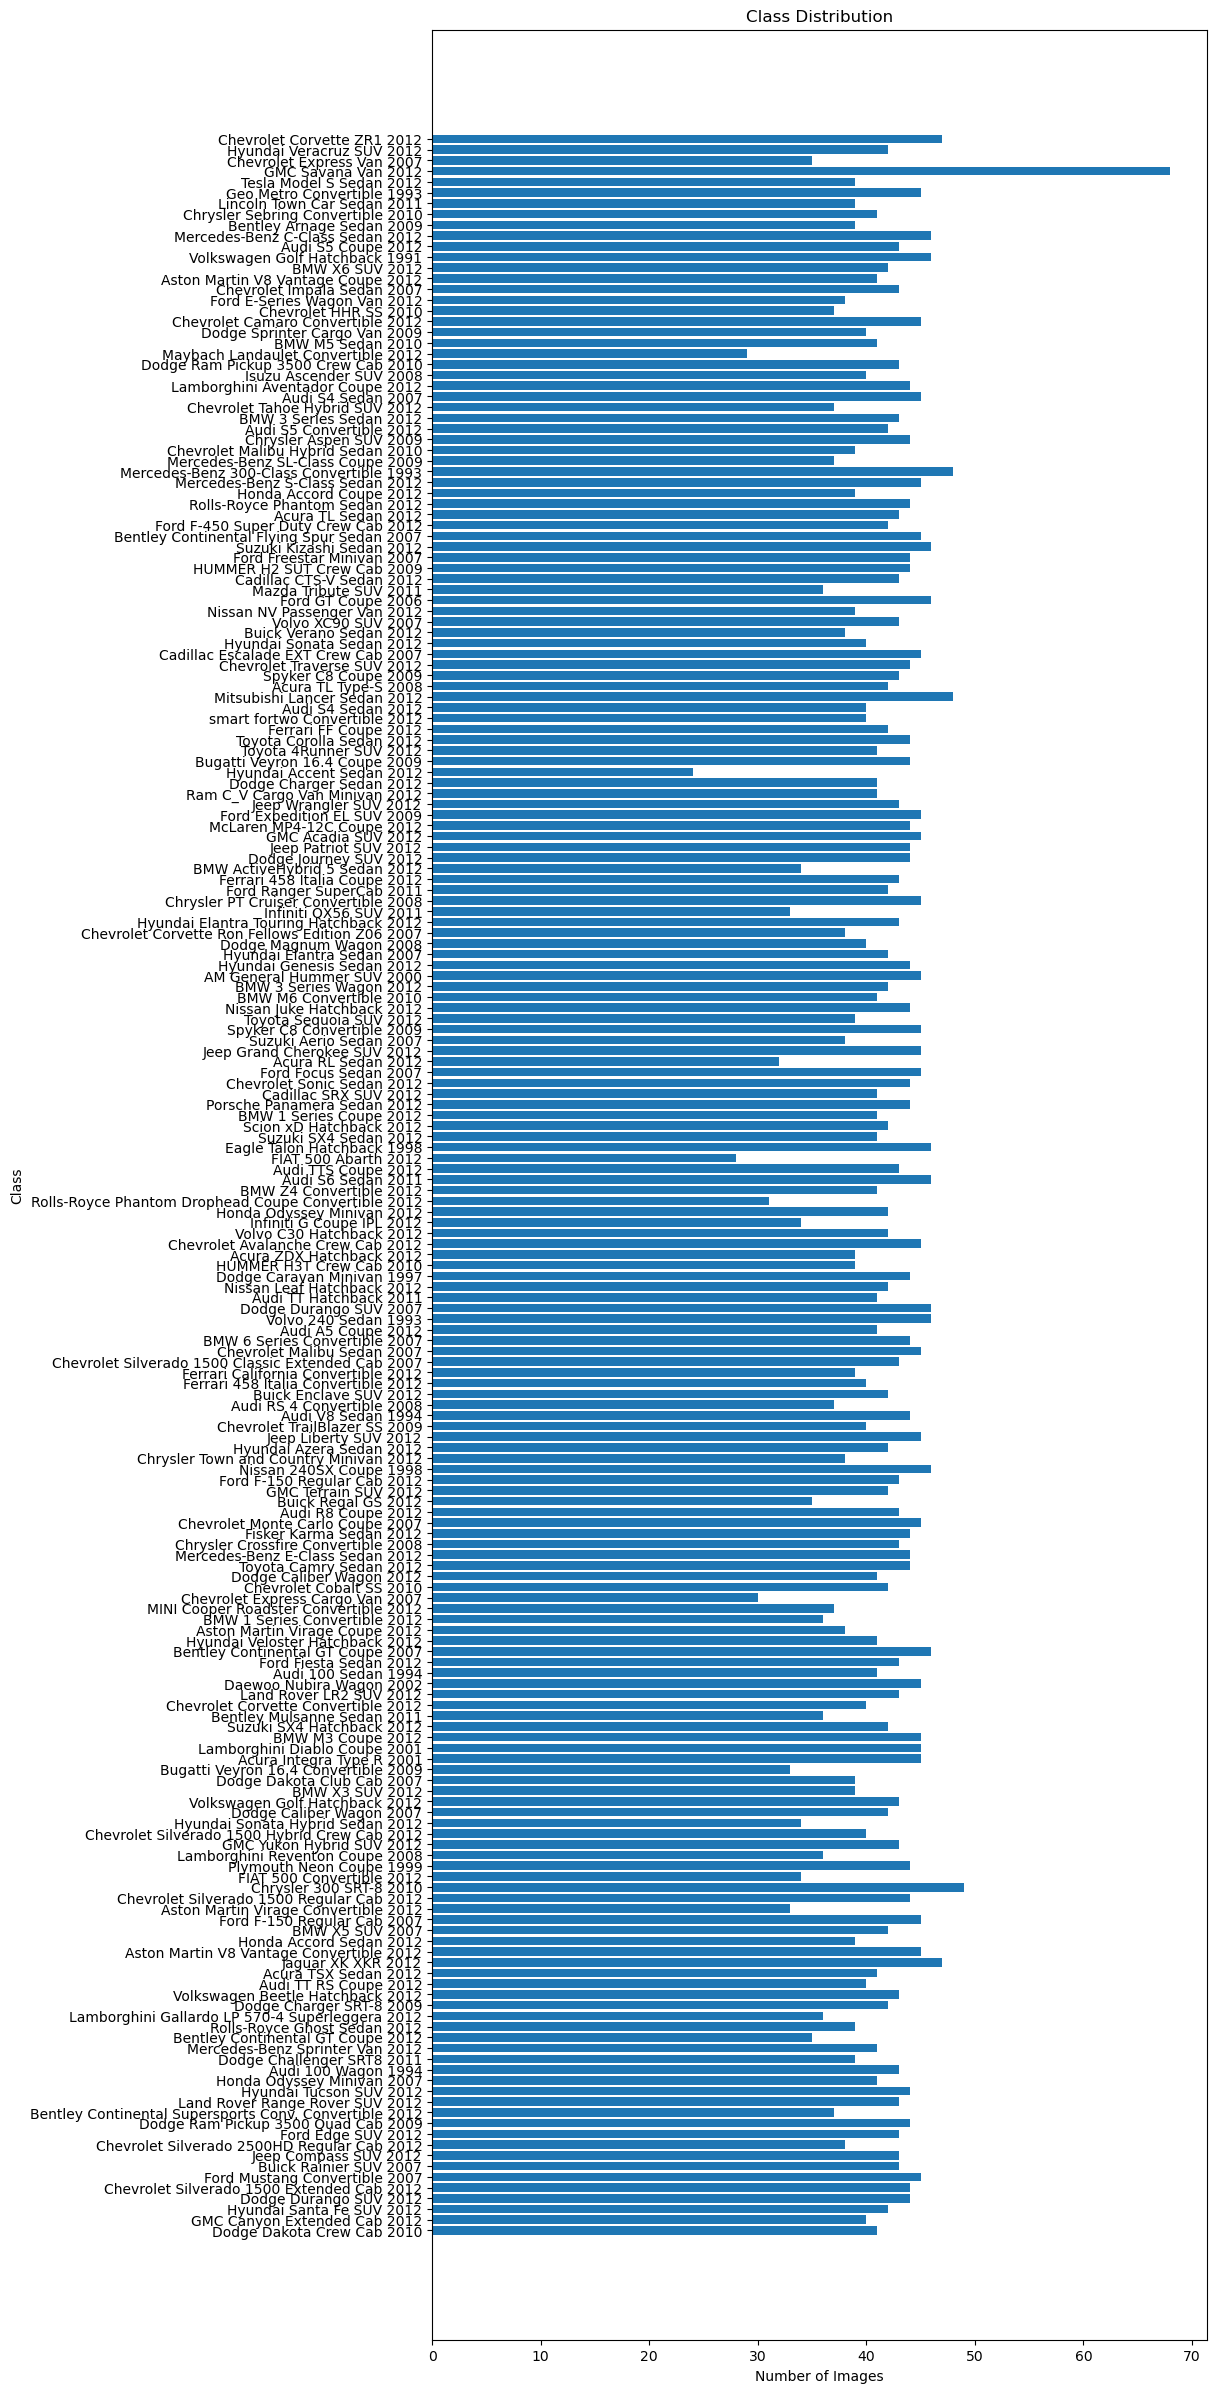

In [19]:
class_distribution = {}

for root, dirs, files in os.walk(source_dir):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        class_images = [file for file in os.listdir(dir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_distribution[dir] = len(class_images)

# Plotting the class distribution
classes = list(class_distribution.keys())
image_counts = list(class_distribution.values())

plt.figure(figsize=(10,30))
plt.barh(classes, image_counts)
plt.xlabel('Number of Images')
plt.ylabel('Class')
plt.title('Class Distribution')
plt.xticks()
plt.show()

In [20]:
class_distribution['GMC Savana Van 2012']

68

In [21]:
class_distribution['FIAT 500 Abarth 2012']

28

Class distribution is generally somewhat even; with the highest being 68 (GMC Savana Van 2012) and the lowest being 28 (FIAT 500 Abarth 200).

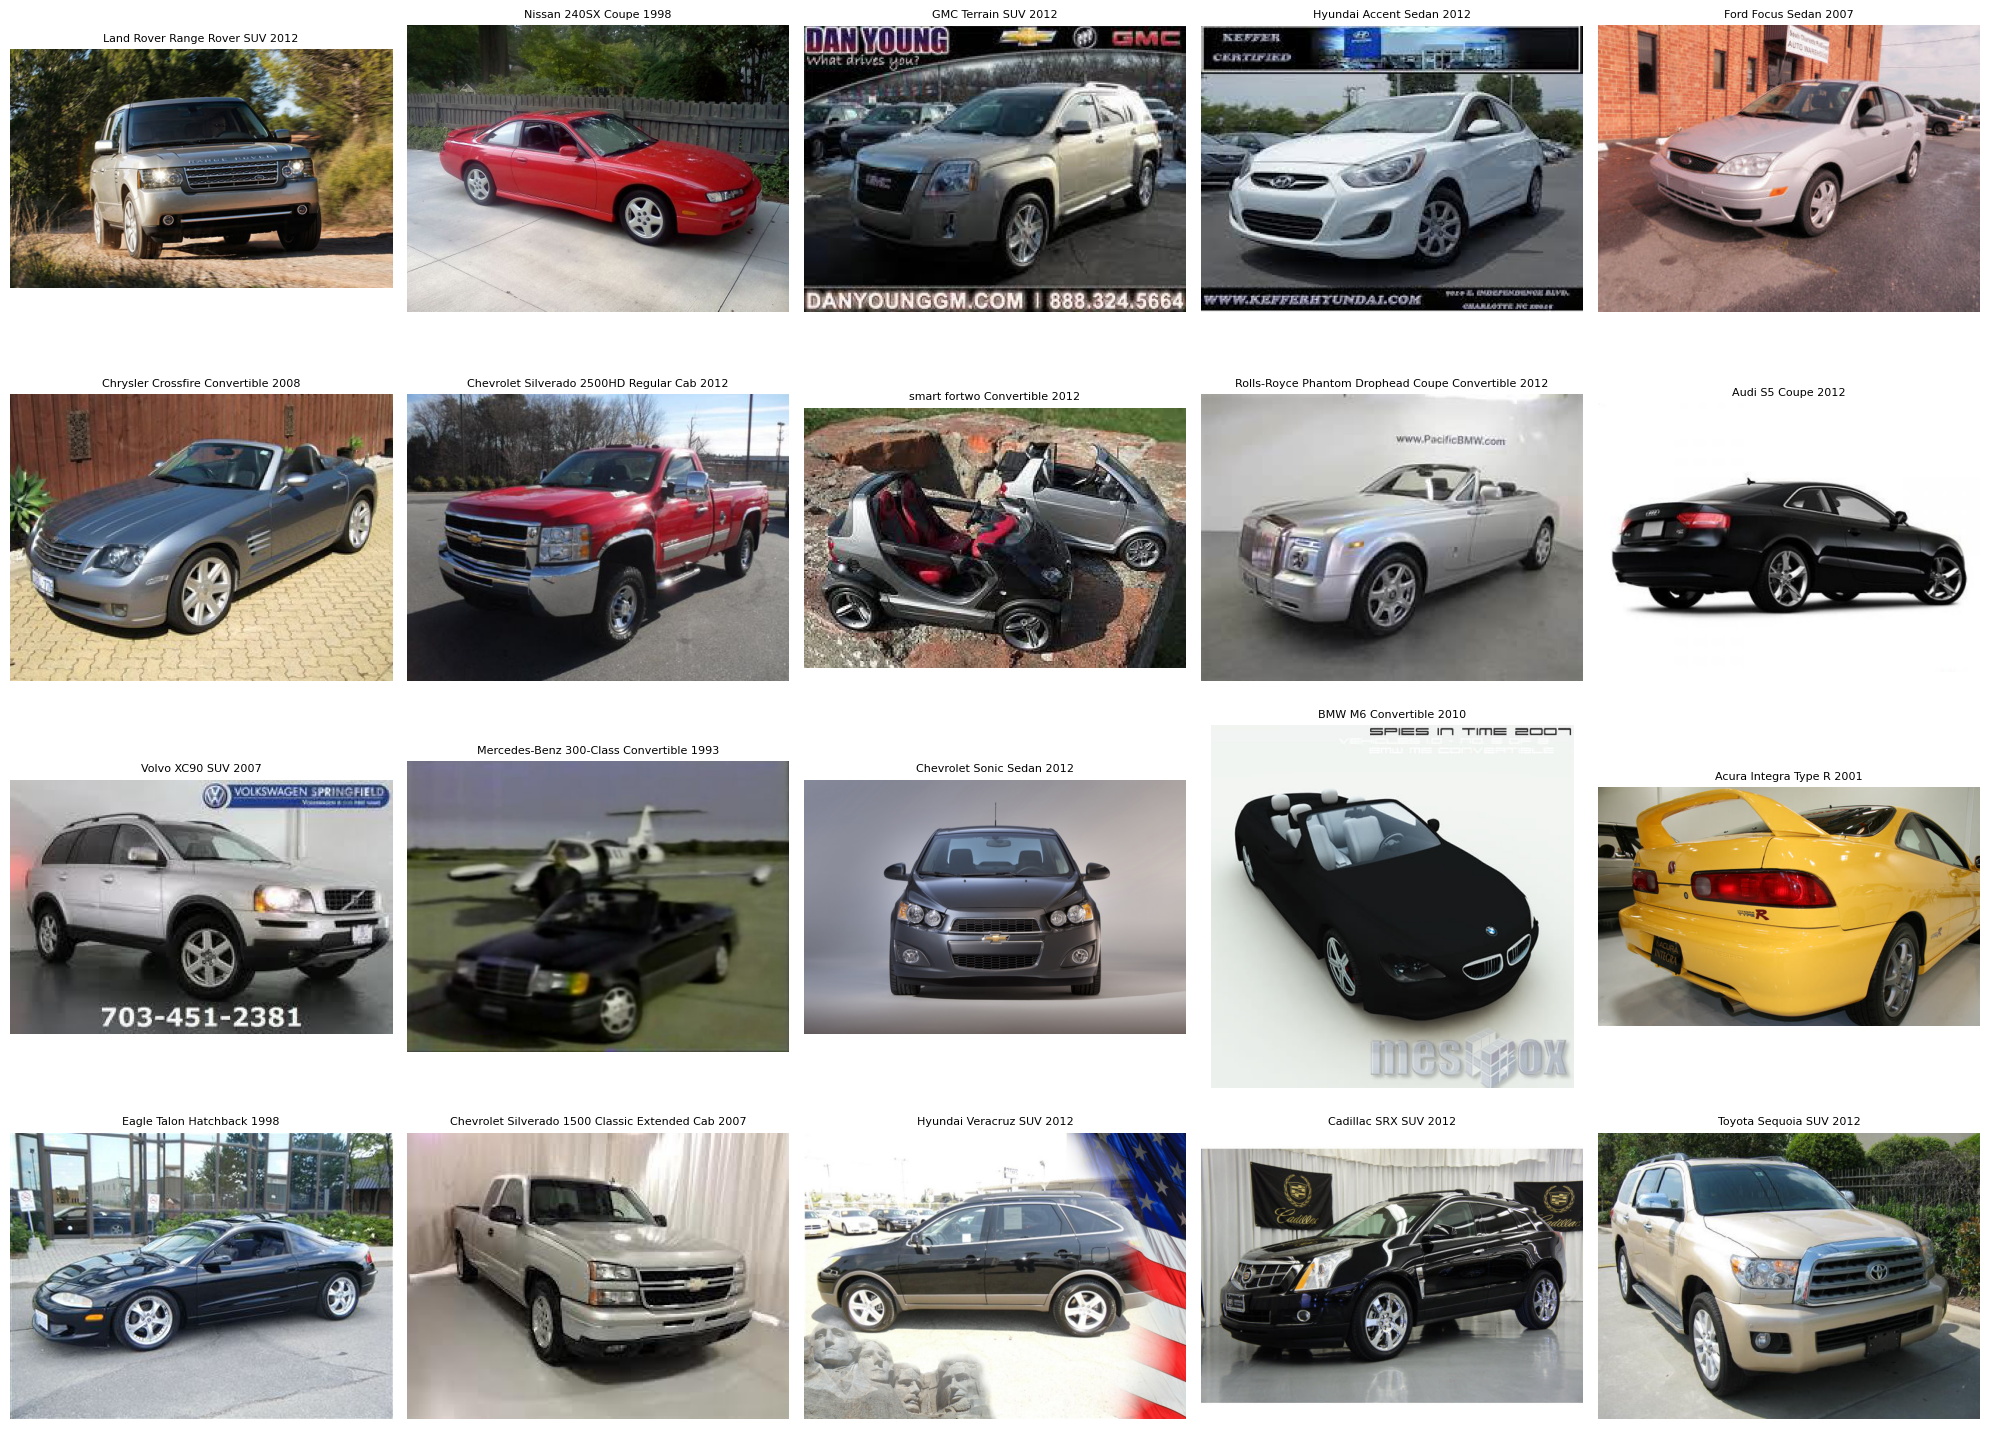

In [4]:
# Display random images - run this cell as many times as required to view a selection of images
display_random_images(source_dir, num_classes=20, grid_size=(4, 5), fig_size=(20, 15))

Comments on images/data:
* The cars are generally in the centre of the images.
* The size of the car varies, may range from 25% - 90% of the image.
* Images are mostly in landscape orientation.
* They are in varied settings (in showroom, on the road, off road settings)
* Background is not always quiet: there may be other objects. Some have background removed; some have pronounced shadow.
* They are taken from different angles: front-on, side, diagonal, from the back.
* Some images have overlaying text or additional text in background
* All images have the car the right side up - would not make sense to flip about x-axis during augmentation?

Implications during preprocessing/feature engineering/augmentation:
1. 